In [43]:
import geopandas as gpd

In [44]:
data = gpd.read_file("data/DEC_lands/DEC_lands/DEC_lands.shp")
data[["CLASS", "COUNTY", "geometry"]].head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [45]:
data["CLASS"].value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [46]:
wild_classes = [c for c in data["CLASS"].dropna().unique() if c.lower().startswith("wild")]
wild = data[data["CLASS"].isin(wild_classes)]
wild.head()


,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,NaN,NaN,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,NaN,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<Axes: >

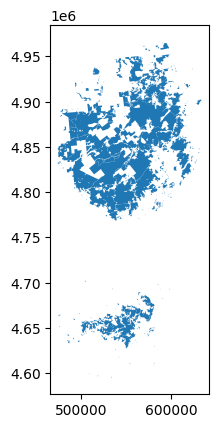

In [47]:
wild.plot()

In [48]:
points_of_interest = gpd.read_file("data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
points_of_interest["ASSET"].value_counts()

ASSET
PRIMITIVE CAMPSITE      1843
UNPAVED PARKING LOT     1574
LEAN-TO                  320
BOAT LAUNCH              162
PAVED PARKING LOT         90
PICNIC SITE               68
SCENIC VISTA              66
FIRE TOWER                32
PICNIC PAVILION           31
PICNIC TABLE              29
OBSERVATION PLATFORM      26
FISHING PIER              20
FISHING PLATFORM          14
FISHING ACCESS SITE       12
DAY USE AREA              11
EQUESTRIAN PLATFORM       11
OBSERVATION TOWER          7
VISITOR CENTER             1
Name: count, dtype: int64

In [49]:
campsites = points_of_interest.loc[points_of_interest['ASSET']=="PRIMITIVE CAMPSITE"]

In [50]:
roads_and_trails = gpd.read_file("data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_and_trails.query("ASSET == 'FOOT TRAIL'")

In [51]:
counties = gpd.read_file("data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

<Axes: >

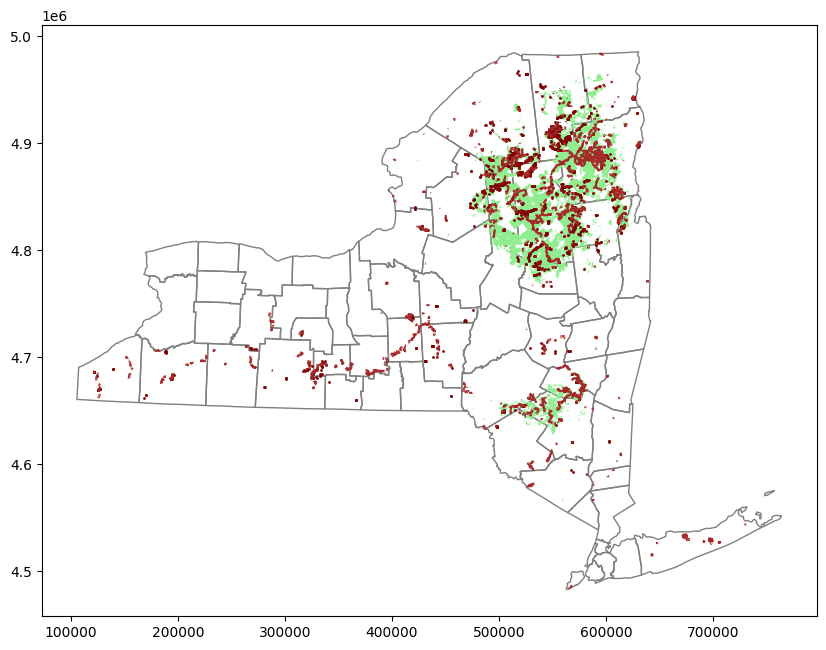

In [53]:
ax = counties.plot(figsize=(10, 10), color='none', edgecolor='grey')
wild.plot(color="lightgreen", ax=ax)
campsites.plot(color="maroon", ax=ax, markersize=1)
trails.plot(color="brown", ax=ax)

# Phillipines / Kiva excersice

In [54]:
kiva_loans = gpd.read_file("data/kiva_loans/kiva_loans/kiva_loans.shp")

In [59]:
kiva_loans_ph = kiva_loans.query("country == 'Philippines'")
kiva_loans_ph.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


In [75]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap['continent'].value_counts()

continent
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

<Axes: >

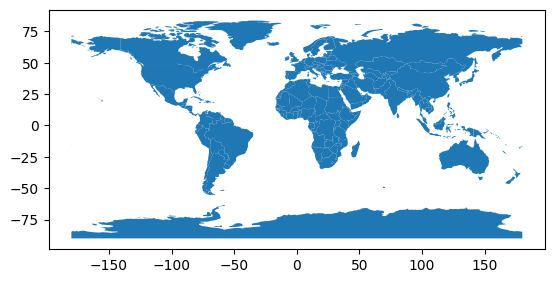

In [76]:
worldmap.plot()

<Axes: >

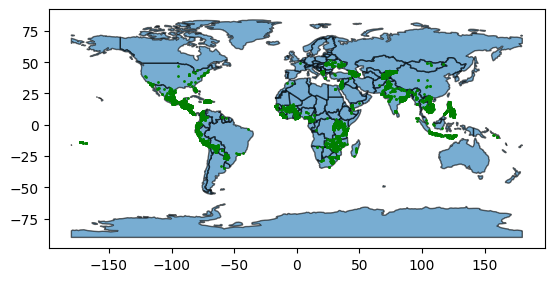

In [85]:
ax = worldmap.plot(alpha=0.6, edgecolor='k')
kiva_loans.plot(color='g', markersize=1, ax=ax)

In [92]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
ph = gpd.read_file("data/Philippines_AL258.kml", driver='KML')

In [93]:
ph.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<Axes: >

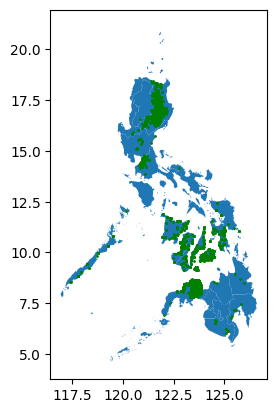

In [95]:
ax = ph.plot()
kiva_loans_ph.plot(ax=ax, color='green', markersize=1)